# Exercise 4

## Import the libraries

In [983]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib

In [984]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## Load the data

In [985]:
X = pd.read_csv('creditcard.csv')

# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)

# Handling the missing values
X.fillna(method ='ffill', inplace = True)

print(X.head())


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

<ipython-input-985-40fe016c1c05>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method ='ffill', inplace = True)


## Pre-process the data

In [986]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

## Reduce the dimensionality of the data using PCA

In [987]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268879
3 -0.481656 -0.097611
4 -0.563512 -0.482506


## Train a DBSCAN model using default values

In [988]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN().fit(X_principal)
labels = db_default.labels_

## Plot the clustered data

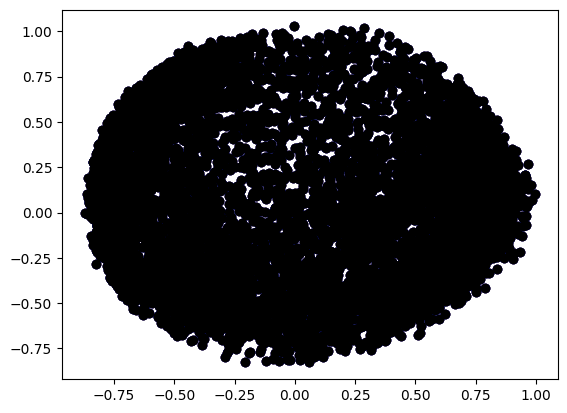

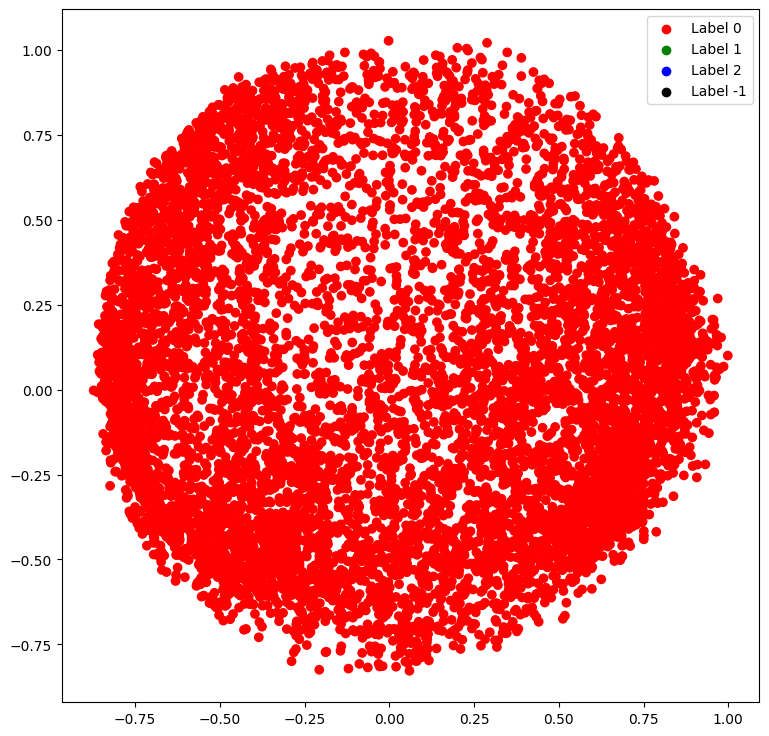

In [989]:
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');

# Plotting P1 on the X-Axis and P2 on the Y-Axis
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)

# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))

plt.show()


1. Train a DBSCAN model

In [1098]:
db = DBSCAN(eps=0.1, min_samples=155)  # Tuned parameters
labels = db.fit_predict(X_principal)

2. Plot the clustered data

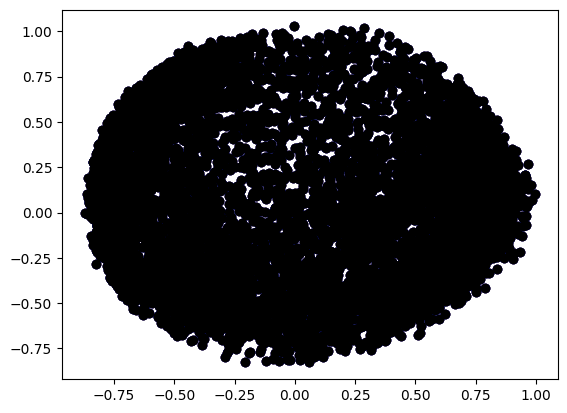

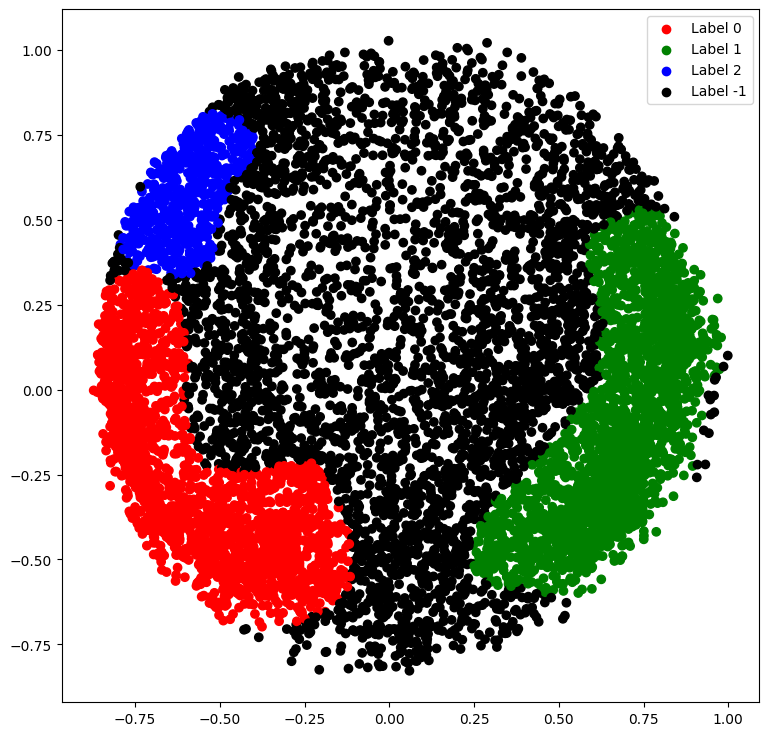

In [1099]:
# Plot the clustered data
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');

# Plotting P1 on the X-Axis and P2 on the Y-Axis
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)

# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))

plt.show()


3. Print the number of clusters

In [1100]:
#put your answer here
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"The number of clusters found are: {n_clusters}")

The number of clusters found are: 3


4. Print the number of noisy data

In [1101]:
#put your answer here
n_noise = list(labels).count(-1)
print(f"The number of noise points are: {n_noise}")

The number of noise points are: 3784


5. Print the silhouette score

In [1106]:
if n_clusters > 1:
    silhouette_score_score = silhouette_score(X_principal, labels)
else:
    silhouette_score_score = -1
print(f"Silhouette Score: {silhouette_score(X_principal, labels)}")

Silhouette Score: 0.20594440446585005


In [1107]:
print(f'Number of clusters: {n_clusters}')
print(f'Number of noisy data points: {n_noise}')
print(f'Silhouette Score: {silhouette_score_score:.2f}')

Number of clusters: 3
Number of noisy data points: 3784
Silhouette Score: 0.21
